# Laplacian Eigenmaps (also called Spectral Embedding)

Laplacian Eigenmaps are used to find a low dimensional representation of data. F.x. a 3d graph can be represented by a matrix. 

First all imports are made, to generate the needed data to represent the graph.



In [1]:
from numpy.random import RandomState
import matplotlib.pyplot as plt
from matplotlib import ticker

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401

from sklearn import manifold, datasets

rng = RandomState(0)

n_samples = 1500
S_points, S_color = datasets.make_s_curve(n_samples, random_state=rng)

From this the graph is made. The graph generated is a 3d s-curve.

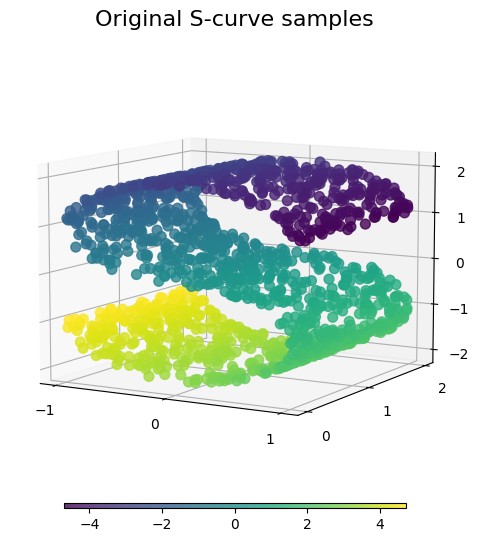

In [2]:
def plot_3d(points, points_color, title):
    x, y, z = points.T

    fig, ax = plt.subplots(
        figsize=(6, 6),
        facecolor="white",
        tight_layout=True,
        subplot_kw={"projection": "3d"},
    )
    fig.suptitle(title, size=16)
    col = ax.scatter(x, y, z, c=points_color, s=50, alpha=0.8)
    ax.view_init(azim=-60, elev=9)
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.zaxis.set_major_locator(ticker.MultipleLocator(1))

    fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
    plt.show()


def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()


def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())


plot_3d(S_points, S_color, "Original S-curve samples")

We then define the number of neighbors, which can be modified to change the shape and information from the original graph. Components are the dimensions the original graph is reduced to, in this case it can only be a 2d graph.

Spectral embedding(Laplacian eigenmaps) is then used to find the low dimensional representation of the graph. The graph is then plotted.

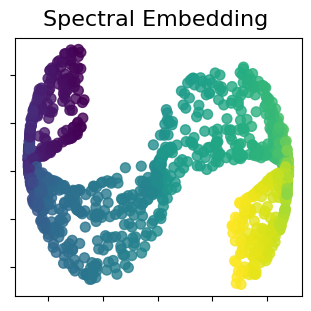

In [46]:
n_neighbors = 800  # neighborhood which is used to recover the locally linear structure
n_components = 2  # number of coordinates for the manifold

spectral = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors
)
S_spectral = spectral.fit_transform(S_points)

plot_2d(S_spectral, S_color, "Spectral Embedding")

It is possible to see that the graph is now a 2d graph, and that the information from the original graph is still present. By changing the number of neighbors, the shape of the graph can be changed. The more neighbors, the more information is kept from the original graph. The less neighbors, the more the graph is simplified.

$\approx 12$ gives the graph a simple curve, while $\approx$ 1000 gives the graph a s-curve as the original graph. 

### Sources:
[Scikit example used](https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py)

[Spectral-embedding/Laplacian eigenmaps algo explained](https://scikit-learn.org/stable/modules/manifold.html#spectral-embedding)
[]()